# German eBay Used Cars Classifieds Analysis

## Introduction
In this notebook we'll explore the used car classifieds section (from german eBay). The data dictionary is provided in a seperate file.
This project is a training one focused around data cleaning with minimal data visualization.
There is some data analysis but it's sparse due to the aim of this project.

We're aiming for (in our analysis) to model our data to represent typically encountered values in the eBay car marketplace, with as much valuable data.

### Setup

In [31]:
# Due to the future warning produced by SNS, which doesn't really influence the output but makes it look nasty
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.precision',2)

In [33]:
autos = pd.read_csv('autos.csv', encoding = 'Windows-1252')

In [34]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [35]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

### Fixing columns

There are 20 columns, most of which are strings and 5 of them contain null values. One standing out issue is the use of camelcase naming (instead of snakecase). 

Next step will be to fix the naming scheme and to make some of the column names more descriptives.

In [36]:
autos.rename(inplace=True, index=str, columns={"yearOfRegistration": "registration_year",
                                                "monthOfRegistration": "registration_month",
                                                "notRepairedDamage": "unrepaired_damage",
                                                "dateCreated": "ad_created",
                                                "dateCrawled": "date_crawled",
                                                "offerType": "offer_type",
                                                "powerPS": "power_ps",
                                                "nrOfPictures": "pictures_amount",
                                                "postalCode": "postal_code",
                                                "vehicleType": "vehicle_type",
                                                "lastSeen": "last_seen_online",
                                                "fuelType": "fuel_type"})

autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'pictures_amount', 'postal_code',
       'last_seen_online'],
      dtype='object')

Made a uniform column naming scheme for easier data manipulation.

### Data Cleaning

And now - basic data exploration to see what (except obvious handling of null values) should be done

In [37]:
autos.describe(include="all")

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,pictures_amount,postal_code,last_seen_online
count,50000,50000,50000,50000,50000,50000,44905,50000.00,47320,50000.00,47242,50000,50000.00,45518,50000,40171,50000,50000.0,50000.00,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-27 22:55:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.07,NaN,116.36,NaN,NaN,5.72,NaN,NaN,NaN,NaN,0.0,50813.63,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.71,NaN,209.22,NaN,NaN,3.71,NaN,NaN,NaN,NaN,0.0,25779.75,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.0,1067.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.00,NaN,70.00,NaN,NaN,3.00,NaN,NaN,NaN,NaN,0.0,30451.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.00,NaN,105.00,NaN,NaN,6.00,NaN,NaN,NaN,NaN,0.0,49577.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.00,NaN,150.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,0.0,71540.00,NaN


From the preliminary look around we can see that in columns `"seller"` and `"offer_type"`, don't contain much useful information, because 49999/50000 values are `"privat"` and `"Angebot"` respectively. We will drop those columns.

We can also see that `odometer` column should contain numeric value, but the suffix "km" makes it a string object. Same case with `price` column. We'll transform it so that the column name will contain the information about the type of units we have here and the values themselves will be transformed to floats.

In [38]:
# dropping "seller" and "offer_type" columns.
autos.drop(autos[['seller', 'offer_type']], axis=1, inplace=True)

# fixing the price and odometer columns
autos.rename(index=str, columns={"price": "price_usd", "odometer": "odometer_km"}, inplace=True)
autos[['price_usd', 'odometer_km']] = (autos[['price_usd', 'odometer_km']]
                                      .replace('[^0-9]', '', regex=True)
                                      .astype(float))

autos.describe(include="all")

,date_crawled,name,price_usd,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,pictures_amount,postal_code,last_seen_online
count,50000,50000,5.00e+04,50000,44905,50000.00,47320,50000.00,47242,50000.00,50000.00,45518,50000,40171,50000,50000.0,50000.00,50000
unique,48213,38754,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-27 22:55:05,Ford_Fiesta,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,9.84e+03,NaN,NaN,2005.07,NaN,116.36,NaN,125732.70,5.72,NaN,NaN,NaN,NaN,0.0,50813.63,NaN
std,NaN,NaN,4.81e+05,NaN,NaN,105.71,NaN,209.22,NaN,40042.21,3.71,NaN,NaN,NaN,NaN,0.0,25779.75,NaN
min,NaN,NaN,0.00e+00,NaN,NaN,1000.00,NaN,0.00,NaN,5000.00,0.00,NaN,NaN,NaN,NaN,0.0,1067.00,NaN
25%,NaN,NaN,1.10e+03,NaN,NaN,1999.00,NaN,70.00,NaN,125000.00,3.00,NaN,NaN,NaN,NaN,0.0,30451.00,NaN
50%,NaN,NaN,2.95e+03,NaN,NaN,2003.00,NaN,105.00,NaN,150000.00,6.00,NaN,NaN,NaN,NaN,0.0,49577.00,NaN
75%,NaN,NaN,7.20e+03,NaN,NaN,2008.00,NaN,150.00,NaN,150000.00,9.00,NaN,NaN,NaN,NaN,0.0,71540.00,NaN


We'll now look a tid bit closer on `"price_usd"`, `"registration_year"`, `"registration_month"`, and `"power_ps"` as those have some weird occurances - like values equal 0 or some outrageous values. We'll analyze those columns for any potential outliers.

We'll start with the `"price_usd"` column.

In [39]:
autos['price_usd'].unique().shape 
# 2357 unique values, won't be able to analyze it purely via value_counts() 
# method.

autos['price_usd'].value_counts().sort_index(ascending=True).head()
# there are 1421 ads that have a price of 0. Let's assume we don't want 
# them in our analysis

autos.loc[(autos['price_usd'] < 100), "price_usd"].value_counts().sum()
# 1762 ads are well below $100, but the bulk of it (80%) is made of free ads.

# Deleting those free ads from our analysis, our initial data set contained 
# 50,000 rows. After dropping those free ads we have 48579, which is correct.
autos.drop(autos[autos['price_usd'] == 0].index, inplace=True)
autos.shape

(48579, 18)

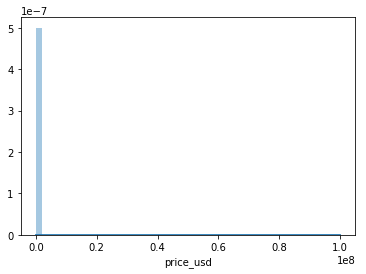

In [40]:
sns.distplot(autos['price_usd'])

Uh oh, we can clearly see that the distribution plot has still some hardcore outliers. We'll focus on the 3rd quartile and remove anything that's beyond $8,000

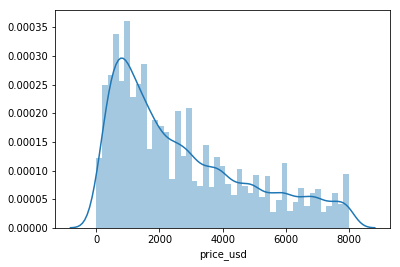

In [41]:
# There's also one outlier on the far right end, with a price of 
# 100,000,000. We'll delete him too.
autos.drop(autos[autos['price_usd'] > 8000].index, inplace=True)
autos.shape

sns.distplot(autos['price_usd'])

After fixing those extreme price rows, we can see that the distribution plot is something more solid we can work with (it's right skewed and we can see most prices lie in between 0 an 2000).

We're now going to focus on `"power_ps"` column.

In [42]:
autos['power_ps'].unique().shape 
# 445 unique values, won't be able to analyze it purely via value_counts() 
# method.

autos['power_ps'].value_counts().sort_index(ascending=True).head()
# there are 4988 ads with 0 horse power in its description. We're going to assume
# that these are the rows that we definitely don't need in our analysis.

autos.loc[(autos['power_ps'].between(1, 20)), "power_ps"].value_counts().sum()
# 60 ads have listed that their product has between 1 and 20 horsepower. Let's
# see what they're selling.


autos.loc[(autos['power_ps'].between(1, 20)), ["name", 'price_usd', 'vehicle_type', 'power_ps']]

,name,price_usd,vehicle_type,power_ps
485,Super_Chrysler_neon_2.0,490.0,limousine,1
844,Golf_Cabrio_zum_Schlachten_ohne_Motor,300.0,cabrio,1
1171,Seat_Leon_Spielzeug_Auto,2.0,limousine,5
1932,Verkaufe_unser_Wohnmobilbegleitfahrzeug_mit_Tr...,2900.0,cabrio,10
2357,Renault_Twizy_Color,6100.0,kleinwagen,11
3825,TRAUMHAFTER_FIAT_500_2_J_tuev_&_H_Zulassung,5900.0,kleinwagen,18
4847,25_kmh_Auto__Seat_Marbella_,655.0,NaN,5
6146,Strandbuggy_mit_Zulassung,3500.0,andere,15
7949,Ford_Fiesta_/_5_Tuerer/_elekt.Fenster_vorn_Sch...,150.0,kleinwagen,6
8248,Mopedauto_Aixam,7800.0,kleinwagen,5


Most of are mopeds and other low horsepower machines, which checks out. We're going to now drop the rows with 0 horsepower. and check the histogram plot to see the distribution

(33146, 18)

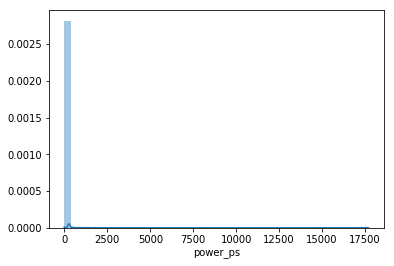

In [43]:
autos.drop(autos[autos['power_ps'] == 0].index, inplace=True)
sns.distplot(autos['power_ps'])
autos.shape

We can see a that we have a list of outliers on the far right end. We're going to find out what's unreasonable.

In [44]:
autos.loc[autos['power_ps'] > 150, 'power_ps'].shape

(4558,)

In [45]:
autos.loc[autos['power_ps'] > 200, 'power_ps'].shape

(1178,)

In [46]:
autos.loc[autos['power_ps'] > 250, 'power_ps'].shape

(324,)

We can see that the difference between 150, 200 and lastly 250 is quite huge, with 250 being the lowest value. We're going to drop those values and see the histogram.

(32822, 18)

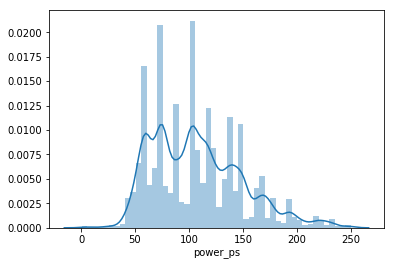

In [47]:
autos.drop(autos[autos['power_ps'] > 250].index, inplace=True)
sns.distplot(autos['power_ps'])
autos.shape

We have our distribution modeled to be much closer to typically encountered values.

And after fixing invalid values, we are going to fix the dates

In [48]:
autos[['date_crawled', 'last_seen_online', 'ad_created', 'registration_month', 'registration_year']].describe(include="all")

,date_crawled,last_seen_online,ad_created,registration_month,registration_year
count,32822,32822,32822,32822.00,32822.00
unique,32047,28386,64,NaN,NaN
top,2016-04-02 15:49:30,2016-04-06 15:16:45,2016-04-03 00:00:00,NaN,NaN
freq,3,6,1265,NaN,NaN
mean,NaN,NaN,NaN,5.85,2002.42
std,NaN,NaN,NaN,3.64,27.66
min,NaN,NaN,NaN,0.00,1937.00
25%,NaN,NaN,NaN,3.00,1998.00
50%,NaN,NaN,NaN,6.00,2002.00
75%,NaN,NaN,NaN,9.00,2006.00


We're seeing a pattern in `"date_crawled"`, `"last_seen_online"`, and `"ad_created"` so we can explore a bit of data using that (we can also convert it to appropriate data type, but this won't be necessery here), and for `"registration_month"` and `"registration_year"` we need to drop outliers.

I've based the decision of dropping the outliers on the fact, that some values (like 9999) are ridiculous and no car after 2017 should be present in the data, same with 1000. I've decided to stick with 1970 < x < 2017 range as this is the most probable and representative group. 

<function matplotlib.pyplot.show(*args, **kw)>

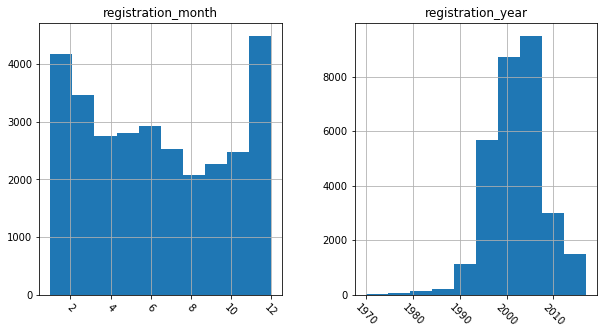

In [49]:
autos.drop(autos[(autos['registration_year'] > 2017)
                 | (autos['registration_year'] < 1970)
                 | (autos['registration_month'] == 0)
                 | (autos['registration_month'] > 12)].index, inplace=True)

autos[['registration_year', 'registration_month']].hist(figsize=(10,5), xrot=315)
plt.show

We can clearly see that most car registrations happened on December, January or February and in year 1995-2010.

Now, after we fixed our weird date ranges in both `"registration_month"` and `"registration_year"` columns, we'll explore the rest of the data set to produce some insights.

### Data Analysis

In [50]:
# Explore on which DAY the ads have been created the most.
autos['ad_created_date'] = pd.to_datetime(autos['ad_created'], errors='coerce')
autos['ad_created_date'].dt.dayofweek.value_counts(normalize = True).sort_values(ascending = False)

0    0.18
5    0.16
1    0.15
6    0.14
2    0.13
3    0.13
4    0.11
Name: ad_created_date, dtype: float64

Most of the ads have been created on Monday (18%), Saturday (16%) and Tuesday (15%).


In [51]:
# Explore on which MONTH the ads have been created the most.
autos['ad_created'] = pd.to_datetime(autos['ad_created'], errors='coerce')
autos['ad_created'].dt.month.value_counts(normalize = True).sort_values(ascending = False)

3     8.38e-01
4     1.61e-01
2     1.17e-03
1     2.34e-04
12    6.68e-05
8     3.34e-05
11    3.34e-05
Name: ad_created, dtype: float64

We can see that most ads have been created on March (84%) and April (16%), other months are rarely seen.

What would be interesting to find out is also how long on average a single ad posting stays before it's taken down.

In [52]:
# Explore on which MONTH the ads have been created the most.
autos['last_seen_online'] = pd.to_datetime(autos['last_seen_online'], errors='coerce')
autos['passed_days_create_delete'] = autos['last_seen_online'].dt.date - autos['ad_created'].dt.date

autos['passed_days_create_delete'].value_counts(normalize=True).sort_values(ascending=False).head(10)

0 days    0.15
2 days    0.11
4 days    0.08
1 days    0.06
6 days    0.06
3 days    0.05
8 days    0.05
9 days    0.04
7 days    0.03
5 days    0.03
Name: passed_days_create_delete, dtype: float64

In [53]:
# The cumulative percentage of first 10 days
autos['passed_days_create_delete'].value_counts(normalize=True).sort_index(ascending=True).head(10).sum()

0.6612580128205129

We can clearly see that ads are dissapearing quite quickly - 15% of ads are taken down in the same day, 11% in 2 days! The cumulative percentile of ads that were taken down in first 10 days is 66.1%, meaning 2/3 of ads are taken down quite quickly (be it due being sold or the seller changing his mind).

Now we're going to explore the most popular car brands.

In [54]:
# There are no NaN values after previous cleaning.
autos['brand'].isna().sum()

autos['brand'].value_counts()

volkswagen        6330
opel              3805
bmw               2700
mercedes_benz     2439
ford              2363
audi              1966
renault           1698
peugeot           1096
fiat               933
seat               639
smart              561
mazda              508
skoda              500
citroen            492
nissan             463
toyota             441
hyundai            323
volvo              298
mitsubishi         287
honda              278
alfa_romeo         232
kia                228
suzuki             209
mini               165
chevrolet          158
sonstige_autos     132
chrysler           120
daihatsu            89
dacia               77
subaru              68
saab                63
daewoo              52
rover               48
jeep                47
lancia              36
land_rover          33
jaguar              27
trabant             22
lada                19
porsche              7
Name: brand, dtype: int64

We can clearly see that the most popular listings do contain a Volkswagen, Opel, BMW and Mercedes Benz vehicles. The least popular is Porshe and Lada. Now, we're going to explore the relationship between brand and average and median of price.

We're going only to analyze top 10 for more robust data.

In [55]:
# initiate variables for better readability
brand_price = {}
brands_unique = autos['brand'].value_counts().head(10).index

for brand in brands_unique:
    average = autos.loc[(autos['brand'] == brand), 'price_usd'].mean()
    median = autos.loc[(autos['brand'] == brand), 'price_usd'].median()
    brand_price[brand] = {'average': average, 'median': median}

brand_price

{'volkswagen': {'average': 2890.7543443917853, 'median': 2300.0},
 'opel': {'average': 2347.4525624178714, 'median': 1690.0},
 'bmw': {'average': 3599.1725925925925, 'median': 3100.0},
 'mercedes_benz': {'average': 3519.7330873308733, 'median': 3100.0},
 'ford': {'average': 2375.4672027084216, 'median': 1699.0},
 'audi': {'average': 3459.6998982706, 'median': 2997.0},
 'renault': {'average': 2051.029446407538, 'median': 1490.0},
 'peugeot': {'average': 2603.5510948905107, 'median': 2100.0},
 'fiat': {'average': 2369.5648445873526, 'median': 1600.0},
 'seat': {'average': 3097.4100156494524, 'median': 2500.0}}

It's interesting to note that most distributions are skewed to the right, as the middle price (median) is in most cases smaller than the mean. On average, the cheapest vehicles are from the Renault brand, and the most expensive from BMW and Mercedes.

Based on this, we're going to find out what's the relationship between mean price and mean mileage.

In [56]:
price_mileage = {}

#Create a dataframe from the brand_price for easier manipulation and analysis
brands_df = pd.DataFrame(brand_price).T

for brand in brands_unique:
    mean_mileage = autos.loc[(autos['brand'] == brand), 'odometer_km'].mean()
    brands_df.at[brand, 'mean_mileage'] = mean_mileage
    
brands_df.sort_values(by='mean_mileage')

,average,median,mean_mileage
fiat,2369.56,1600.0,121521.97
peugeot,2603.55,2100.0,130141.42
seat,3097.41,2500.0,130438.18
ford,2375.47,1699.0,130850.61
renault,2051.03,1490.0,131224.97
opel,2347.45,1690.0,133978.98
volkswagen,2890.75,2300.0,139021.33
mercedes_benz,3519.73,3100.0,142566.63
bmw,3599.17,3100.0,144222.22
audi,3459.70,2997.0,146136.83


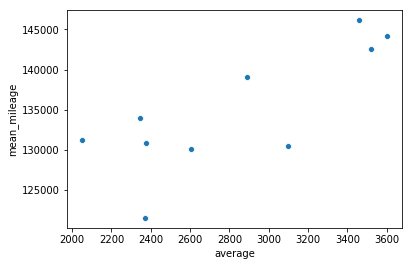

In [57]:
sns.scatterplot(x = 'average', y = 'mean_mileage', data=brands_df)

We can see that there's a positive trend between the average price and the mean mileage.